# Model: Logistic Regression sex and pclass

This notebook walks through the steps of creating a logistic regression model using only the sex and pclass feature. 

A gender only submission to the Kaggle public leader board will yield a 0.76555 accuracy.

https://www.kaggle.com/mnassrib/notebook

# Initialization

In [1]:
%run init.ipynb

In [2]:
from sklearn.linear_model import LogisticRegression 

## Extract Clean Data

**Separate data into X (features) and y (label)**

In [3]:
Xy = pd.read_csv('../data/processed/train.csv', index_col='passengerid')
Xy

,survived,pclass,name,sex,sibsp,parch,ticket,fare,embarked,title,last_name,cabin_number,family_size,age_estimate,age,age_bin,is_child,is_travelling_alone
passengerid,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,Mr,Braund,21171.0,2,33.0,22.0,"(20.0, 30.0]",False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,Mrs,Cumings,17599.0,2,35.9,38.0,"(30.0, 40.0]",False,False
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,Miss,Heikkinen,3101282.0,1,22.0,26.0,"(20.0, 30.0]",False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,Mrs,Futrelle,113803.0,2,35.9,35.0,"(30.0, 40.0]",False,False
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,Mr,Allen,373450.0,1,33.0,35.0,"(30.0, 40.0]",False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S,Mr,Montvila,211536.0,1,33.0,27.0,"(20.0, 30.0]",False,True
888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S,Miss,Graham,112053.0,1,22.0,19.0,"(10.0, 20.0]",False,True
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S,Miss,Johnston,6607.0,4,22.0,22.0,"(20.0, 30.0]",False,False


## Encode Categorical Columns

In [4]:
encoded_features = ['sex', 'pclass']

Xy_encoded = (pd.get_dummies(Xy[encoded_features], columns=encoded_features, drop_first=True)
              #.drop(['sex_male', 'pclass_2'], axis=1)
             )
Xy_encoded 

,sex_male,pclass_2,pclass_3
passengerid,,,
1,1,0,1
2,0,0,0
3,0,0,1
4,0,0,0
5,1,0,1
...,...,...,...
887,1,1,0
888,0,0,0
889,0,0,1


### Split data into train and test. 

In [5]:
X = Xy_encoded
y = Xy['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=RANDOM_STATE)

print(f'Number of sample in training data = {len(X_train)}')
print(f'Number of sample in test data = {len(X_test)}')

Number of sample in training data = 534
Number of sample in test data = 357


### Logistic Regression with only sex as the independent variable

In [6]:
model = LogisticRegression(verbose=True, fit_intercept=True, max_iter=500, random_state=20)
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
y_pred

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=20, solver='warn', tol=0.0001, verbose=True,
                   warm_start=False)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,

In [7]:
pm.calc_model_rst_table_metrics(model, X_train, y_train,)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

Accuracy: 0.7958 (+/- 0.1158)
Recall: 0.6959 (+/- 0.1682)
Precision: 0.7455 (+/- 0.1621)
F1: 0.7189 (+/- 0.1585)


10/28/19, <model>, 0.7958, 0.6959,0.7455,0.7189, NS


# Visual Confusion Matrix

In [10]:
font = {'family' : 'arial',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

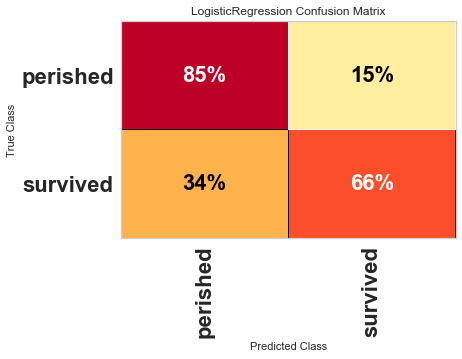

In [11]:
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=['perished','survived'], percent=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show();

# Prepare Submission

In [2]:
def prepare_submission():

    data_kaggle = ExtractData('../data/raw/holdout.csv')

    return data_kaggle

data_kaggle = prepare_submission()

In [102]:
X_submission = X = pd.get_dummies(Xy_submission['sex'], drop_first=True)
X_submission

,male
passengerid,
892,1
893,0
894,1
895,1
896,0
...,...
1305,1
1306,0
1307,1


In [132]:
y_pred = logreg.predict(X_submission)

y_submission = pd.Series(y_pred, index=X_submission.index, name='Survived').to_frame()
y_submission.index.names = ['PassengerId']
y_submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [133]:
y_kaggle_submission = (pd.read_csv('../data/raw/gender_submission.csv')
                .set_index('PassengerId')
               )
y_kaggle_submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [136]:
y_kaggle_submission.equals(y_submission)

True

In [134]:
(y_kaggle_submission.index == y_submission.index).all()
y_kaggle_submission.index.names == y_submission.index.names
(y_kaggle_submission.columns == y_submission.columns).all()

True

True

True

In [137]:
y_submission.to_csv('gender_only_logistic_regression.csv')